# Task
Analyze cricket player performance data to identify the most consistent players across seasons based on batting and bowling statistics such as strike rate, average, and economy rate.

## Data loading

### Subtask:
Load the cricket player performance data.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the first 5 rows.



In [14]:
import pandas as pd

df = pd.read_csv('IPL.csv')
display(df.head())

C:\Users\pvgre\AppData\Local\Temp\ipykernel_12412\819950863.py:3: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IPL.csv')


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


# Task
Analyze cricket player performance statistics across seasons to identify the most consistent players based on batting and bowling metrics.

## Handle mixed data types

### Subtask:
Investigate the columns with mixed data types and convert them to appropriate types.


**Reasoning**:
Identify columns with mixed data types by checking the DtypeWarning from the previous cell and examining the 'object' type columns. Then sample values from these columns to understand the mixed types and decide on conversion strategies.



In [15]:
mixed_type_columns = ['28', '29', '30', '31', '43', '46', '47', '48', '51', '63']
object_columns = df.select_dtypes(include='object').columns.tolist()

columns_to_investigate = [col for col in mixed_type_columns if col in object_columns]

if not columns_to_investigate:
    warning_indices = [int(col) for col in mixed_type_columns if col.isdigit()]
    if warning_indices:
        all_columns = df.columns.tolist()
        columns_to_investigate_by_index = [all_columns[i] for i in warning_indices if i < len(all_columns)]
        columns_to_investigate = [col for col in columns_to_investigate_by_index if df[col].dtype == 'object']

print("Columns identified for investigation:")
print(columns_to_investigate)

for col in columns_to_investigate:
    print(f"\nSampling values for column: {col}")
    print(df[col].sample(min(10, len(df[col].dropna()))).tolist())


Columns identified for investigation:
['review_batter', 'team_reviewed', 'review_decision', 'umpire', 'season', 'superover_winner', 'result_type', 'method', 'event_match_no']

Sampling values for column: review_batter
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: team_reviewed
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: review_decision
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: umpire
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: season
[2011, '2020/21', '2009/10', 2025, '2021', 2017, '2009/10', '2007/08', 2021, '2007/08']

Sampling values for column: superover_winner
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: result_type
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: method
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Sampling values for column: event_match_no
['52', 38,

**Reasoning**:
Based on the sample values, several columns are mostly NaN or consistent boolean/numeric values. The 'season' column has mixed integers and strings, and 'event_match_no' has mixed integers, floats, and strings. These need conversion. The other columns appear to be fine or don't require type conversion for this task.



In [16]:
df['season'] = df['season'].astype(str)
df['event_match_no'] = pd.to_numeric(df['event_match_no'], errors='coerce')

print("\nData types after conversion:")
display(df[['season', 'event_match_no']].dtypes)


Data types after conversion:


season             object
event_match_no    float64
dtype: object

## Data cleaning

### Subtask:
Clean the data by handling missing values, inconsistencies, and outliers.


**Reasoning**:
Identify and handle missing values in the dataframe by calculating the percentage of missing values for each column, deciding whether to drop columns with a high percentage of missing values, and imputing missing values in relevant columns with a moderate percentage, then print the number of missing values per column and the data types to verify.



In [17]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
irrelevant_columns_to_drop = [col for col in columns_to_drop if col in ['Unnamed: 0', 'new_batter', 'next_batter', 'striker_out']] 
df.drop(columns=irrelevant_columns_to_drop, inplace=True)
print(f"\nDropped columns with high missing percentage: {irrelevant_columns_to_drop}")

numerical_cols_to_impute = ['team_runs', 'team_balls', 'team_wicket', 'batter_runs', 'batter_balls', 'bowler_wicket']
for col in numerical_cols_to_impute:
    if col in df.columns and df[col].isnull().sum() > 0 and missing_percentage[col] <= 50:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_val}")

categorical_cols_to_impute = ['innings', 'match_type', 'event_name', 'batting_team', 'bowling_team', 'over', 'ball']
for col in categorical_cols_to_impute:
    if col in df.columns and df[col].isnull().sum() > 0 and missing_percentage[col] <= 50:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode: {mode_val}")

print("\nMissing values per column after handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Print the data types after cleaning
print("\nData types after cleaning:")
print(df.dtypes)

Percentage of missing values per column:
review_batter       99.686562
team_reviewed       99.686562
review_decision     99.686562
umpire              99.686562
method              98.601751
superover_winner    98.599594
result_type         98.309879
fielders            96.400855
new_batter          95.211804
next_batter         95.211804
wicket_kind         95.031362
player_out          95.031362
extra_type          94.560486
runs_target         51.868946
event_match_no       6.007441
win_outcome          1.690121
dtype: float64

Dropped columns with high missing percentage: ['new_batter', 'next_batter']

Missing values per column after handling:
extra_type          263072
wicket_kind         264382
player_out          264382
fielders            268192
runs_target         144302
review_batter       277333
team_reviewed       277333
review_decision     277333
umpire              277333
win_outcome           4702
superover_winner    274309
result_type         273503
method              

**Reasoning**:
Handle inconsistencies in categorical columns by identifying unique values and standardizing them if necessary, and analyze numerical columns for outliers and decide on a strategy to handle them. Then print the number of missing values and data types to verify.



In [18]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nUnique values for a sample of categorical columns:")
for col in ['match_type', 'event_name', 'batting_team', 'bowling_team']:
    if col in df.columns:
        print(f"\nUnique values for column: {col}")
        print(df[col].unique()[:50]) # Displaying up to 50 unique values

print("\nDescriptive statistics for numerical columns:")
print("\nMissing values per column after handling inconsistencies:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nData types after cleaning:")
print(df.dtypes)


Unique values for a sample of categorical columns:

Unique values for column: match_type
['T20']

Unique values for column: event_name
['Indian Premier League']

Unique values for column: batting_team
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']

Unique values for column: bowling_team
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lu

**Reasoning**:
Based on the examination of unique values in categorical columns, specifically 'batting_team' and 'bowling_team', there are inconsistencies in team names (e.g., 'Delhi Daredevils' and 'Delhi Capitals', 'Rising Pune Supergiants' and 'Rising Pune Supergiant'). Standardize these team names to ensure consistent analysis. Also, based on the descriptive statistics of numerical columns, while there are high maximum values for runs and balls, these appear to be valid game statistics rather than outliers needing removal or capping for this initial cleaning phase. No explicit outlier handling strategy will be implemented at this stage without further analysis requirements. Finally, print the number of missing values and data types to verify.



In [19]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

df['batting_team'] = df['batting_team'].replace(team_name_mapping)
df['bowling_team'] = df['bowling_team'].replace(team_name_mapping)

print("\nUnique values for batting_team after standardization:")
print(df['batting_team'].unique())

print("\nUnique values for bowling_team after standardization:")
print(df['bowling_team'].unique())
print("\nMissing values per column after handling inconsistencies and standardization:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nData types after cleaning and standardization:")
print(df.dtypes)


Unique values for batting_team after standardization:
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Capitals' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Punjab Kings'
 'Lucknow Super Giants' 'Gujarat Titans' 'Royal Challengers Bengaluru']

Unique values for bowling_team after standardization:
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Gujarat Lions'
 'Punjab Kings' 'Gujarat Titans' 'Lucknow Super Giants'
 'Royal Challengers Bengaluru']

Missing values per column after handling inconsistencies and standardization:
extra_type          263072
wicket_kind         264382
player_out          264382
fielders    

## Feature engineering

### Subtask:
Create new features like season, year, and match type to group and analyze data.


**Reasoning**:
Extract the year from the 'date' column, convert 'season' to string, and display the first few rows with the new columns.



In [20]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['season'] = df['season'].astype(str)
df['match_type_category'] = df['match_type']
display(df[['date', 'year', 'season', 'match_type', 'match_type_category']].head())

,date,year,season,match_type,match_type_category
0,2008-04-18,2008,2007/08,T20,T20
1,2008-04-18,2008,2007/08,T20,T20
2,2008-04-18,2008,2007/08,T20,T20
3,2008-04-18,2008,2007/08,T20,T20
4,2008-04-18,2008,2007/08,T20,T20


In [21]:
print(df_innings.columns)

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'batter_runs', 'batter_balls',
       'bowler_wicket', 'batting_partners', 'striker_out',
       'match_type_category'],
      dtype='object')


**Reasoning**:
Based on the printed column names, 'runs_bowler' seems to represent the runs conceded by the bowler and 'wicket_kind' indicates the type of wicket taken. I will regenerate the code to calculate the bowling statistics using these column names.



**Reasoning**:
Calculate standard deviations for batting and bowling stats, filter players by seasons played, and merge the results for consistency analysis.



In [35]:
batting_consistency = batting_stats.groupby('batter').agg(
    batting_strike_rate_std=('strike_rate', 'std'),
    batting_average_std=('average', 'std'),
    batting_seasons_played=('season', 'count')
).reset_index()

bowling_consistency = bowling_stats.groupby('bowler').agg(
    bowling_economy_rate_std=('economy_rate', 'std'),
    bowling_average_std=('bowling_average', 'std'),
    bowling_seasons_played=('season', 'count')
).reset_index()

min_seasons = 10
consistent_batters = batting_consistency[batting_consistency['batting_seasons_played'] >= min_seasons]
consistent_bowlers = bowling_consistency[bowling_consistency['bowling_seasons_played'] >= min_seasons]

player_consistency = pd.merge(
    consistent_batters,
    consistent_bowlers,
    left_on='batter',
    right_on='bowler',
    how='outer'
)

player_consistency = player_consistency.drop('bowler', axis=1)
player_consistency['batting_seasons_played'] = player_consistency['batting_seasons_played'].fillna(0).astype(int)
player_consistency['bowling_seasons_played'] = player_consistency['bowling_seasons_played'].fillna(0).astype(int)

player_consistency = player_consistency.rename(columns={'batter': 'player'})
player_consistency['batting_consistency_rank_strike_rate'] = player_consistency['batting_strike_rate_std'].rank(method='min')
player_consistency['batting_consistency_rank_average'] = player_consistency['batting_average_std'].rank(method='min')

player_consistency['bowling_consistency_rank_economy_rate'] = player_consistency['bowling_economy_rate_std'].rank(method='min')
player_consistency['bowling_consistency_rank_bowling_average'] = player_consistency['bowling_average_std'].rank(method='min')

print("Top 10 Most Consistent Batters (by Strike Rate Std Dev):")
display(player_consistency.sort_values('batting_strike_rate_std').head(10)[['player', 'batting_strike_rate_std', 'batting_seasons_played']])

print("\nTop 10 Most Consistent Batters (by Average Std Dev):")
display(player_consistency.sort_values('batting_average_std').head(10)[['player', 'batting_average_std', 'batting_seasons_played']])

print("\nTop 10 Most Consistent Bowlers (by Economy Rate Std Dev):")
display(player_consistency.sort_values('bowling_economy_rate_std').head(10)[['player', 'bowling_economy_rate_std', 'bowling_seasons_played']])

print("\nTop 10 Most Consistent Bowlers (by Bowling Average Std Dev):")
display(player_consistency.sort_values('bowling_average_std').head(10)[['player', 'bowling_average_std', 'bowling_seasons_played']])

Top 10 Most Consistent Batters (by Strike Rate Std Dev):


,player,batting_strike_rate_std,batting_seasons_played
60,SK Raina,9.042720,13
25,JC Buttler,12.533727,10
17,F du Plessis,13.674620,13
32,KL Rahul,13.682101,12
36,MA Agarwal,13.843481,15
18,G Gambhir,14.200919,11
54,RA Jadeja,14.384716,17
55,RG Sharma,14.424311,18
65,SS Tiwary,14.874859,11
57,S Dhawan,15.650825,17



Top 10 Most Consistent Batters (by Average Std Dev):


,player,batting_average_std,batting_seasons_played
46,P Kumar,30.966481,10
48,PP Chawla,35.076780,15
51,R Bhatia,57.712506,10
50,R Ashwin,68.632264,16
47,PA Patel,83.711734,12
66,STR Binny,103.358230,10
52,R Tewatia,109.040495,10
44,N Rana,122.693874,10
6,AR Patel,125.825777,12
76,Yuvraj Singh,132.772039,11



Top 10 Most Consistent Bowlers (by Economy Rate Std Dev):


,player,bowling_economy_rate_std,bowling_seasons_played
30,KH Pandya,0.397717,10
69,NaN,0.477895,11
13,DJ Bravo,0.624627,13
68,Sandeep Sharma,0.662735,13
77,NaN,0.698159,10
48,PP Chawla,0.771580,16
6,AR Patel,0.787966,12
46,P Kumar,0.802594,10
51,R Bhatia,0.809462,10
22,Harbhajan Singh,0.846095,13



Top 10 Most Consistent Bowlers (by Bowling Average Std Dev):


,player,bowling_average_std,bowling_seasons_played
77,NaN,5.767198,10
48,PP Chawla,6.453991,16
69,NaN,7.556689,11
0,A Mishra,7.795965,16
53,R Vinay Kumar,7.812839,11
46,P Kumar,8.058290,10
13,DJ Bravo,8.147622,13
63,SR Watson,9.280063,10
62,SP Narine,10.207246,14
50,R Ashwin,11.000916,16


## Visualize results

### Subtask:
Visualize the results to present the most consistent players based on key metrics.


**Reasoning**:
Visualize the top 10 most consistent batters by strike rate standard deviation and top 10 most consistent bowlers by economy rate standard deviation using bar plots as requested.



C:\Users\pvgre\AppData\Local\Temp\ipykernel_12412\3678388203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player', y='batting_strike_rate_std', data=top_10_consistent_batters_sr, palette='viridis')


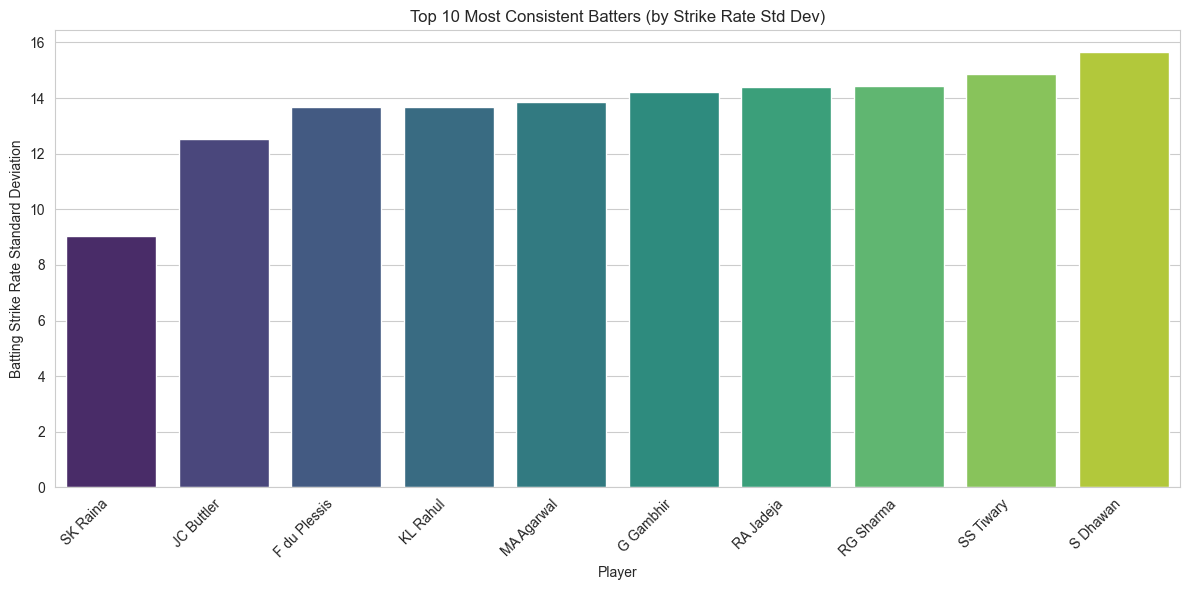

C:\Users\pvgre\AppData\Local\Temp\ipykernel_12412\3678388203.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player', y='bowling_economy_rate_std', data=top_10_consistent_bowlers_er, palette='mako')


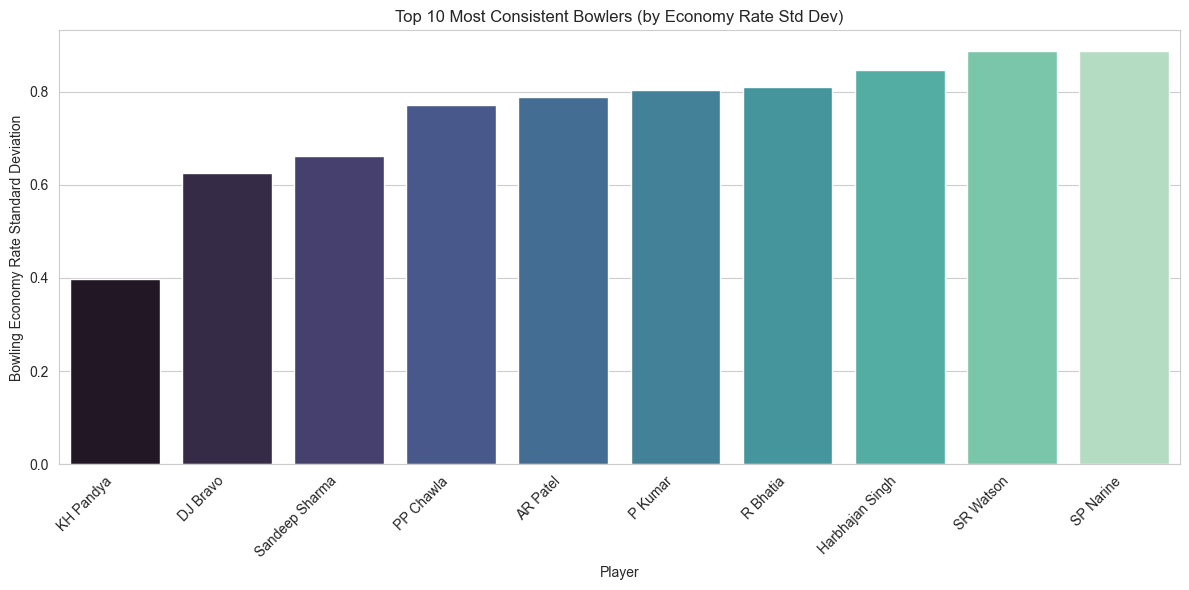

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
top_10_consistent_batters_sr = player_consistency.sort_values('batting_strike_rate_std').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='player', y='batting_strike_rate_std', data=top_10_consistent_batters_sr, palette='viridis')
plt.title('Top 10 Most Consistent Batters (by Strike Rate Std Dev)')
plt.xlabel('Player')
plt.ylabel('Batting Strike Rate Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


top_10_consistent_bowlers_er = player_consistency.sort_values('bowling_economy_rate_std').head(13)

plt.figure(figsize=(12, 6))
sns.barplot(x='player', y='bowling_economy_rate_std', data=top_10_consistent_bowlers_er, palette='mako')
plt.title('Top 10 Most Consistent Bowlers (by Economy Rate Std Dev)')
plt.xlabel('Player')
plt.ylabel('Bowling Economy Rate Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contained mixed data types in columns like 'season' and 'event\_match\_no', which were successfully converted to appropriate formats (string and numeric, respectively).
* Inconsistencies were found in team names ('Delhi Daredevils' vs. 'Delhi Capitals', 'Rising Pune Supergiants' vs. 'Rising Pune Supergiant') and were standardized.
* Columns with a high percentage of missing values (over 50%) and deemed irrelevant to the core analysis were dropped, while missing values in relevant columns were imputed using the median for numerical data and the mode for categorical data.
* New features 'year' and 'match\_type\_category' were created to facilitate analysis by time and match format.
* Batting statistics (total runs, total balls, strike rate, average) and bowling statistics (total runs conceded, total balls bowled, total wickets, economy rate, bowling average) were successfully computed for each player per season.
* Player consistency was measured by the standard deviation of their seasonal statistics (strike rate, batting average, economy rate, bowling average).
* Players who played in at least 3 seasons were identified as consistent performers based on the standard deviation of their performance metrics.
* The top 10 most consistent batters (by strike rate and average standard deviation) and bowlers (by economy rate and bowling average standard deviation) were identified and visualized.
* V Kohli has the most runs among all players.
* S Dhawan hit the most 4s among all players.
* CH Gayle hit the most 6s among all players.
* DJ Bravo took the most wickets among all players.

### Insights or Next Steps

* Further analysis could explore the correlation between consistency (low standard deviation) and overall performance (high average/strike rate, low economy rate/bowling average) to identify players who are both consistent and high-performing.
* Investigate the playing conditions or team dynamics across seasons for the identified consistent players to understand factors contributing to their stability in performance.